# **Part 1** &mdash; Blob Detection

In [2]:
import numpy as np
import cv2 as cv

sift = cv.SIFT_create()

# Print the tunable parameters of the SIFT detector
print("--- Tunable Parameters of SIFT Detector ---")
print("nfeatures:", sift.getNFeatures())                  # Number of features
print("nOctaveLayers:", sift.getNOctaveLayers())          # Number of octave layers
print("contrastThreshold:", sift.getContrastThreshold())  # Constrast threshold
print("edgeThreshold:", sift.getEdgeThreshold())          # Edge threshold
print("sigma:", sift.getSigma())                          # Sigma


--- Tunable Parameters of SIFT Detector ---
nfeatures: 0
nOctaveLayers: 3
contrastThreshold: 0.04
edgeThreshold: 10.0
sigma: 1.6


### **Tunable Parameters** &mdash; What the default values mean:
* **Number of features**:
  * **0** &mdash;  no limit on the number of detected keypoints.
* **Number of octave layers**:
  * **3** &mdash; three scale levels are examined per octave.
* **Contrast Threshold**:
  * **0.04** &mdash; keypoints with contrast below 0.04 are discarded.
* **Edge Threshold**:
  * **10** &mdash; keypoints with edge responses stronger than this are removed.
* **Sigma**:
  * **1.6** &mdash; Gaussian blur with σ = 1.6 is applied to the input image before processing.



In [3]:
img = cv.imread('images/example-image.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

keypoints = sift.detect(gray, None)

# Keypoints encoding attributes of first 2 keypoints
print(f"Number of keypoints detected: {len(keypoints)}")
for i, kp in enumerate(keypoints[:2]):
    print(f"Keypoint {i+1}:")            
    print(f"  - Angle: {kp.angle}")
    print(f"  - Class ID: {kp.class_id}")
    print(f"  - Octave: {kp.octave}")
    print(f"  - Position: ({kp.pt[0]}, {kp.pt[1]})")
    print(f"  - Response: {kp.response}")
    print(f"  - Size: {kp.size}")

Number of keypoints detected: 384
Keypoint 1:
  - Angle: 29.3697509765625
  - Class ID: -1
  - Octave: 14615042
  - Position: (25.056865692138672, 96.4741439819336)
  - Response: 0.01890508085489273
  - Size: 22.15937614440918
Keypoint 2:
  - Angle: 96.75640869140625
  - Class ID: -1
  - Octave: 14615042
  - Position: (25.056865692138672, 96.4741439819336)
  - Response: 0.01890508085489273
  - Size: 22.15937614440918


In [4]:
# Draw keypoints on the image
output_image = cv.drawKeypoints(
    gray,
    keypoints,
    None, 
    flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Write the output image to a file in the images folder
cv.imwrite('images/sift_keypoints_output.jpg', output_image)
cv.imwrite('images/example-image_gray.jpg', gray)

True

### **Original Image and Output Image:**
<img src="images/example-image_gray.jpg" width="425"/> <img src="images/sift_keypoints_output.jpg" width="425"/> 

# **Part 2** &mdash; Tunning blob detection performance
Must reinitialize the sift detector so that it captures as many circles on the input image as possible.

In [5]:
sift = cv.SIFT_create(
    nfeatures=0,            # 0 = no cap; don't artificially stop at 300
    contrastThreshold=0.099,
    edgeThreshold=20,       # higher => don't throw out responses that look "edge-like"
    sigma=3.0,             # slightly LOWER blur so very small dots aren't smoothed away
    nOctaveLayers=3       # more scale levels per octave => better chance to catch both tiny and large dots
)

new_keypoints = sift.detect(gray, None)

print("--- Number of old SIFT vs new SIFT keypoints ---")
print(f"  - Old: {len(keypoints)}")
print(f"  - New: {len(new_keypoints)}")

new_output_image = cv.drawKeypoints(
    gray,
    new_keypoints,
    None, 
    flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv.imwrite('images/new_sift_keypoints_output.jpg', new_output_image)

--- Number of old SIFT vs new SIFT keypoints ---
  - Old: 384
  - New: 108


True

### New Output Image:
<img src="images/new_sift_keypoints_output.jpg" width="425"/> 

# **Part 3** &mdash; Descriptors

In [ ]:
import math

keypoints, descriptors = sift.compute(gray, new_keypoints)

# A well-fitting blob keypoint to analyze at index 41
good_kp, good_desc = keypoints[41], descriptors[41]

print("Chosen keypoint info:")
print("  - location (x,y):", kp.pt)
print("  - size (scale):", kp.size)
print("  - angle (deg):", kp.angle)

# ---------------------------------------
# Draw the keypoint AND a rectangle patch
# ---------------------------------------

# Copy grayscale into BGR so we can draw colored overlays
vis_img = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

# center of keypoint
x, y = good_kp.pt

# base half-side from SIFT keypoint scale
half_side = good_kp.size / 2.0

# add a fixed margin (e.g., 40 px) to make the rectangle larger but still centered
margin = 15
half_side = half_side + margin

# compute corners
x1 = int(x - half_side)
y1 = int(y - half_side)
x2 = int(x + half_side)
y2 = int(y + half_side)

# clamp to image bounds
x1 = max(x1, 0)
y1 = max(y1, 0)
x2 = min(x2, w - 1)
y2 = min(y2, h - 1)

# draw the rectangle around the patch
cv.rectangle(
    vis_img,
    (x1, y1),
    (x2, y2),
    (0, 255, 0),  # green
    2
)

cv.imwrite('images/keypoint_and_patch.jpg', vis_img)

# also keep the plain keypoint rendering if you want it
singular_output_image = cv.drawKeypoints(
    vis_img,
    [good_kp],
    None,
    flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

cv.imwrite('images/singular_sift_keypoint_and_patch.jpg', singular_output_image)


Chosen keypoint info:
  - location (x,y): (25.056865692138672, 96.4741439819336)
  - size (scale): 22.15937614440918
  - angle (deg): 96.75640869140625


True

### Chosen Keypoint for Descriptor Analysis:
<img src="images/singular_sift_keypoint_and_patch.jpg" width="425"/> 

### Sample of descriptors

In [39]:
# Print out the descriptor elements
print("--- First 10 Values of the Descriptor ---")
for i in range(10):
    print(f"Descriptor element {i}: {good_desc[i]}")

--- First 10 Values of the Descriptor ---
Descriptor element 0: 19.0
Descriptor element 1: 17.0
Descriptor element 2: 6.0
Descriptor element 3: 4.0
Descriptor element 4: 1.0
Descriptor element 5: 0.0
Descriptor element 6: 7.0
Descriptor element 7: 9.0
Descriptor element 8: 2.0
Descriptor element 9: 4.0


### Visualize descriptors
Create a visualization of the 128-dimensional SIFT descriptor as a 4×4 grid of 8-bin orientation histograms, where each subplot represents one spatial cell in the SIFT descriptor and each bar corresponds to the gradient strength in a particular direction (0°, 45°, 90°, …, 315°).

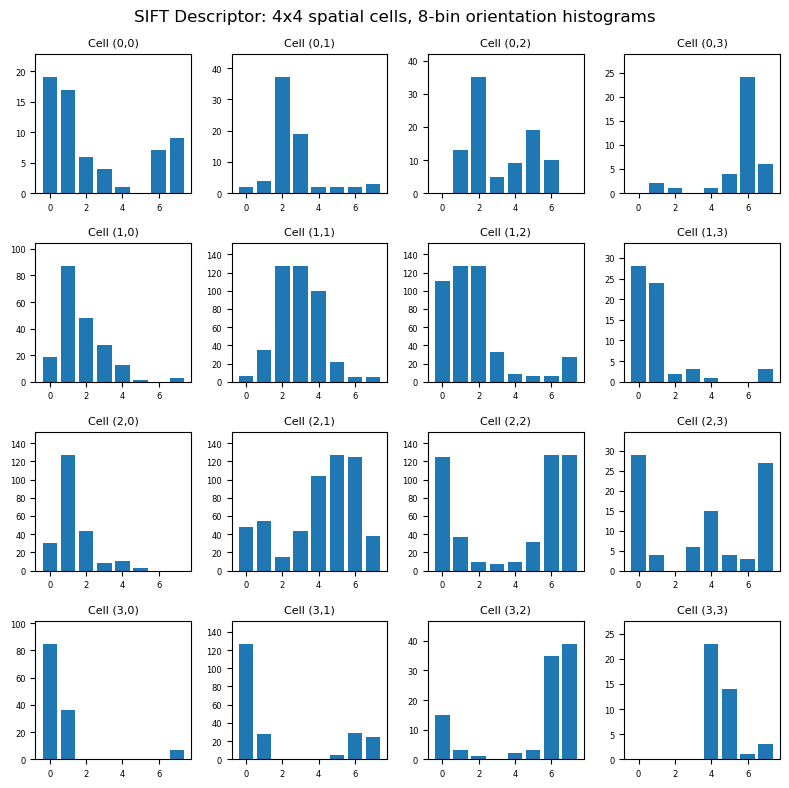

In [40]:
import matplotlib.pyplot as plt

def visualize_sift_descriptor(desc, save_path='images/sift_descriptor_grid.png'):
    desc = np.array(desc, dtype=float).reshape(4, 4, 8)

    fig, axes = plt.subplots(4, 4, figsize=(8, 8))
    fig.suptitle("SIFT Descriptor: 4x4 spatial cells, 8-bin orientation histograms", fontsize=12)

    # We'll label orientation bins 0..7 (which roughly correspond to angles 0°,45°,...315°)
    bin_indices = np.arange(8)

    for i in range(4):
        for j in range(4):
            hist = desc[i, j, :]

            ax = axes[i, j]
            ax.bar(bin_indices, hist)

            # cosmetic tweaks
            ax.set_xticks([0, 2, 4, 6])
            ax.set_ylim(0, max(hist)*1.2 if np.max(hist) > 0 else 1e-3)
            ax.set_title(f"Cell ({i},{j})", fontsize=8)
            ax.tick_params(axis='both', which='major', labelsize=6)

    plt.tight_layout()
    plt.savefig(save_path, dpi=200)
    plt.show()

# Call it on your chosen keypoint's descriptor:
visualize_sift_descriptor(good_desc)


# **Part 4** &mdash; Feature Matching

### Apply affine tranformation to original image

In [41]:
# original image from Part 2
image1 = gray  # keep a copy

# ----- make a transformed version (rotate + scale) -----
(h, w) = image1.shape[:2]
center = (w // 2, h // 2)

scale = 0.8          # shrink a bit
angle_deg = 25       # rotate a bit

M = cv.getRotationMatrix2D(center, angle_deg, scale)
image2 = cv.warpAffine(image1, M, (w, h))

cv.imwrite('images/example-image-transformed.jpg', image2)

True

### Transformed image:
<img src="images/example-image-transformed.jpg" width="425"/> 

### Detect Keypoint in both images

In [42]:
# Detect+describe features in image1
keypoints1, descriptors1 = sift.detectAndCompute(image1, None)

# Detect+describe features in image2
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

print("Image1: keypoints =", len(keypoints1), "descriptors =", descriptors1.shape)
print("Image2: keypoints =", len(keypoints2), "descriptors =", descriptors2.shape)


Image1: keypoints = 108 descriptors = (108, 128)
Image2: keypoints = 137 descriptors = (137, 128)


### Feature match

In [43]:
# Create the Brute-Force matcher
bf = cv.BFMatcher(cv.NORM_L2, crossCheck=True)

# Match descriptors from image1 to image2
matches = bf.match(descriptors1, descriptors2)

print("Total raw matches:", len(matches))

# Sort matches by distance (lower distance = better match)
matches = sorted(matches, key=lambda m: m.distance)

# For clarity, keep the best 50
good_matches = matches[:50]
print("Good matches we're going to draw:", len(good_matches))

Total raw matches: 63
Good matches we're going to draw: 50


### Visualize matches

In [44]:
matched_img = cv.drawMatches(
    image1, keypoints1,
    image2, keypoints2,
    good_matches,
    None,
    flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

cv.imwrite('images/sift_matches.jpg', matched_img)

True

### Feature matched images:
<img src="images/sift_matches.jpg" width="800"/>